In [3]:
## for speech to text
import speech_recognition as sr


## for audio processing and analytical study
from pydub import AudioSegment ##for audio spliting
from pydub.silence import split_on_silence

## for audio collection
import pyaudio
import wave

## for text recognition
import nltk

## for general studies
from os import listdir
from os.path import isfile, join
import glob
from numpy import fft as fft
import matplotlib.pyplot as plt
import numpy as np
import sys
import seaborn as sns
from tqdm import tqdm
import time as time
import multiprocessing as mp
 
%matplotlib inline
# !ls Data/EC_06022018

In [4]:
def text_clean(in_text):
    '''clean and remove some common words'''
    tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
    
    # Tokenizing the text
    tokens = tokenizer.tokenize(in_text)
    # A new list to hold the lowercased words
    words = []
    for word in tokens:
        words.append(word.lower())
        
    # Getting the English stop words from nltk
    sw = nltk.corpus.stopwords.words('english')
    
    # A new list with No Stop words
    words_ns = []

    # Appending to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    # Creating the word frequency distribution
    freqdist = nltk.probability.FreqDist(words_ns)

    # Plotting the word frequency distribution
    plt.clf()
    fig=plt.figure(figsize=(6, 4))
    plt.subplots_adjust(bottom=0.3)
    freqdist.plot(10)
    fig.savefig("Plot/word_freq.pdf", format="pdf")    
    print(freqdist.most_common(5))
    
    out_text = " ".join(str(x) for x in words_ns)
    return out_text

In [5]:
def SoundToText(file=""):
    '''Uses Sphinx builtin. 
    Input is a dic contained as config'''
    if file != "":
        print(file)
        test = sr.AudioFile(file)
        Recon  = sr.Recognizer()
        with test as source:
            test_au = Recon.record(source)
        text = Recon.recognize_sphinx(test_au, language='en-US')
        return {file: text}
    else:
        print('STH is wrong!')
        return ""

## Just to make it work

['Data/Live/output_9.wav', 'Data/Live/output_8.wav', 'Data/Live/output_11.wav', 'Data/Live/output_10.wav', 'Data/Live/output_12.wav', 'Data/Live/output_13.wav', 'Data/Live/output_14.wav', 'Data/Live/output_5.wav', 'Data/Live/output_4.wav', 'Data/Live/output_6.wav', 'Data/Live/output_7.wav', 'Data/Live/output_3.wav', 'Data/Live/output_2.wav', 'Data/Live/output_0.wav', 'Data/Live/output_1.wav']
 Running 15 jobs on 6 cores
Data/Live/output_9.wav
Data/Live/output_8.wav
Data/Live/output_10.wav
Data/Live/output_11.wav
Data/Live/output_13.wav
Data/Live/output_12.wav
['Data/Live/output_9.wav', 'Data/Live/output_8.wav', 'Data/Live/output_11.wav', 'Data/Live/output_10.wav', 'Data/Live/output_12.wav', 'Data/Live/output_13.wav', 'Data/Live/output_14.wav', 'Data/Live/output_5.wav', 'Data/Live/output_4.wav', 'Data/Live/output_6.wav', 'Data/Live/output_7.wav', 'Data/Live/output_3.wav', 'Data/Live/output_2.wav', 'Data/Live/output_0.wav', 'Data/Live/output_1.wav']
Data/Live/output_14.wav
Data/Live/outp

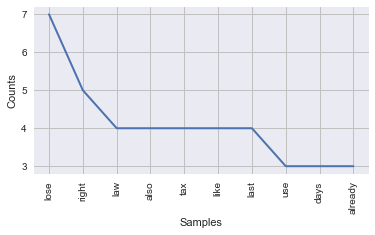

[('lose', 7), ('right', 5), ('law', 4), ('also', 4), ('tax', 4)]
--- 55.276888847351074 seconds ---


In [6]:
start_time = time.time()

mytasks = []
while len(mytasks) < 15:
    time.sleep(1)
    mytasks = glob.glob("Data/Live/output_*.wav")
print(mytasks)
## don't open a file without it being done
time.sleep(1)

print(" Running %s jobs on %s cores" % (len(mytasks), mp.cpu_count()-2))
npool = min(len(mytasks), mp.cpu_count()-2)
pool  = mp.Pool(npool)
print(mytasks)
inputdic = {}
for i in range(len(mytasks)):
    inputdic[i] = {"file":"Data/Live/output_" + str(i) + ".wav", "n":i}
    
mytextdic = {}
for result in pool.map(SoundToText, mytasks):
        mytextdic.update(result)
mytext = ""
for i in range(len(mytextdic.keys())):
    mytext += mytextdic["Data/Live/output_" + str(i) + ".wav"]
print(mytext)
text_clean(mytext)
print("--- %s seconds ---" % (time.time() - start_time))

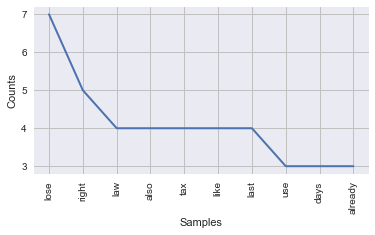

[('lose', 7), ('right', 5), ('law', 4), ('also', 4), ('tax', 4)]
fine let alone love wear fullprogress actual law ye scramble partisans bizarre also lot lie got rights law things often lose lose awful actually gotten east news article thati also mean reforms blood loss leung wai right always argued jacket wonderful show really afraid events fast ball reform lost wrestled styleat look new stars one want minute full law people attractive market ideas though losers always asses listen tax taxable wrestle movies like meit like black read order importance polls generated tax authorizes guy pays like colonel asked lot well tell resources ilet hope enormously useful need set let blew lose reckless saw east well party despair axel axel hammered eyes crops reason also last season doomed insulted fulfilledi actually use refuse start happen wide range options government found lose act health problems congress wrong lose utilized hostages right wrestled catwalkthese yeah knew lose lose heart beat 

In [7]:
print(text_clean(mytext))

In [10]:
with open('Data/NPR/191_trans.txt', 'r') as myfile:
    newtext=myfile.read().replace('\n', '')
with open('Data/NPR/191.txt', 'r') as myfile:
    sumtext=myfile.read().replace('\n', '')

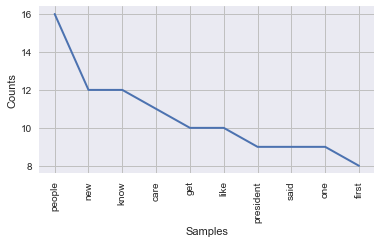

[('people', 16), ('new', 12), ('know', 12), ('care', 11), ('get', 10)]


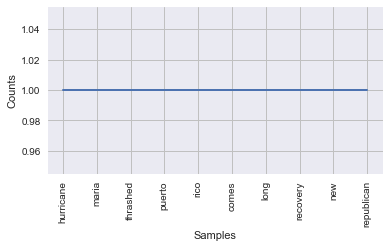

[('hurricane', 1), ('maria', 1), ('thrashed', 1), ('puerto', 1), ('rico', 1)]
hurricane maria terms roads rivers knocked power rico years border governor recorder elite evil could hurt let recovery gets least kelly david green first faultsthe senate expected vote new health care plan next week another republican attempt average placing affordable care act could lead planned health care know many new york president tromp meets afghan president awestruck gotti today talking way forward war tall blond danny says willcomes new u strategy means american military footprint country getting bigger stay us guide station support outburst following message come bastard sending organic sustainable ingredients divorce put himwilson around thirty minutes jews five new line options deeper bought dollars first quarter bastard dot com slash outburst support also comes american express pay listen opt us busy gets right point american express open knows got work bailedthe rights point open got see americ

In [11]:
print(text_clean(newtext),  text_clean(sumtext) )

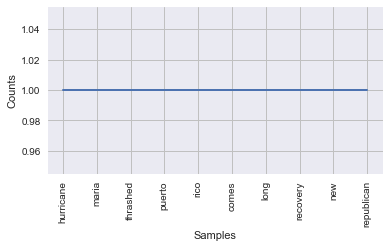

[('hurricane', 1), ('maria', 1), ('thrashed', 1), ('puerto', 1), ('rico', 1)]


'hurricane maria thrashed puerto rico comes long recovery new republican plan overhaul affordable care act also president trump reaffirms america commitment afghanistan 20170921'

In [12]:
text_clean(sumtext)